In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wrangle import prep_pola, wrangle_pola

import tabula

import scipy.stats as stats

import os
import requests
import pandas as pd

In [2]:
df = wrangle_pola()
df.head(20)

,num_at_anchor,num_at_berth,departed,avg_days_at_berth,avg_days_anchor_berth
date,,,,,
2015-05-01,0.0,12.0,5.0,5.80,5.80
2015-05-04,0.0,7.0,4.0,3.00,4.50
2015-05-05,1.0,7.0,4.0,1.50,1.50
2015-05-06,1.0,10.0,2.0,1.50,1.50
2015-05-07,1.0,13.0,2.0,2.00,2.00
2015-05-08,1.0,13.0,2.0,2.00,2.00
2015-05-11,0.0,9.0,9.0,3.88,4.11
2015-05-12,0.0,9.0,3.0,1.00,1.00
2015-05-13,0.0,11.0,1.0,1.00,1.00


<Axes: xlabel='date'>

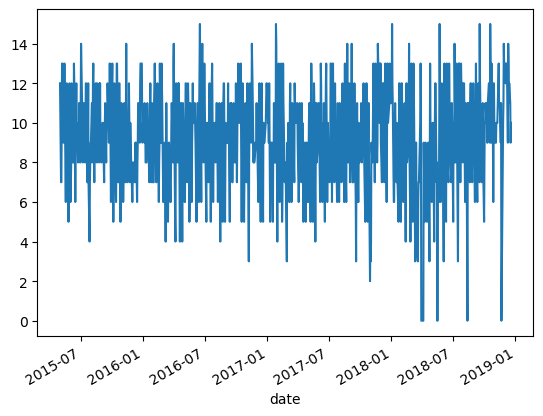

In [3]:
df.num_at_berth.plot()

In [4]:
df['year'] = pd.DatetimeIndex(df.index).year
df['month'] = pd.DatetimeIndex(df.index).month
df['day'] = pd.DatetimeIndex(df.index).day

In [5]:
df['backlog'] = df.avg_days_anchor_berth - df.avg_days_at_berth
df.head(20)

,num_at_anchor,num_at_berth,departed,avg_days_at_berth,avg_days_anchor_berth,year,month,day,backlog
date,,,,,,,,,
2015-05-01,0.0,12.0,5.0,5.80,5.80,2015,5,1,0.00
2015-05-04,0.0,7.0,4.0,3.00,4.50,2015,5,4,1.50
2015-05-05,1.0,7.0,4.0,1.50,1.50,2015,5,5,0.00
2015-05-06,1.0,10.0,2.0,1.50,1.50,2015,5,6,0.00
2015-05-07,1.0,13.0,2.0,2.00,2.00,2015,5,7,0.00
2015-05-08,1.0,13.0,2.0,2.00,2.00,2015,5,8,0.00
2015-05-11,0.0,9.0,9.0,3.88,4.11,2015,5,11,0.23
2015-05-12,0.0,9.0,3.0,1.00,1.00,2015,5,12,0.00
2015-05-13,0.0,11.0,1.0,1.00,1.00,2015,5,13,0.00


In [6]:
df.sample(20)

,num_at_anchor,num_at_berth,departed,avg_days_at_berth,avg_days_anchor_berth,year,month,day,backlog
date,,,,,,,,,
2017-05-30,0.0,9.0,1.0,6.00,6.00,2017,5,30,0.00
2018-11-28,0.0,14.0,2.0,3.00,3.00,2018,11,28,0.00
2015-08-20,0.0,10.0,3.0,3.66,3.66,2015,8,20,0.00
2017-06-19,0.0,5.0,2.0,3.50,3.50,2017,6,19,0.00
2017-10-04,0.0,11.0,3.0,2.66,2.66,2017,10,4,0.00
2016-11-09,0.0,10.0,4.0,1.40,2.25,2016,11,9,0.85
2015-08-11,1.0,11.0,2.0,1.50,1.50,2015,8,11,0.00
2018-08-20,0.0,7.0,4.0,4.25,4.25,2018,8,20,0.00
2016-05-03,0.0,6.0,3.0,2.00,2.00,2016,5,3,0.00


In [7]:
train = df.iloc[:round(len(df)*.7)]
val = df.iloc[round(len(df)*.7):round(len(df)*.85)]
test = df.iloc[round(len(df)*.85):]

In [8]:
train.tail()

,num_at_anchor,num_at_berth,departed,avg_days_at_berth,avg_days_anchor_berth,year,month,day,backlog
date,,,,,,,,,
2017-11-15,0.0,13.0,3.0,2.0,2.0,2017,11,15,0.0
2017-11-16,0.0,11.0,5.0,2.2,2.2,2017,11,16,0.0
2017-11-17,0.0,10.0,2.0,4.0,4.0,2017,11,17,0.0
2017-11-20,0.0,8.0,3.0,4.3,4.3,2017,11,20,0.0
2017-11-21,0.0,9.0,3.0,3.7,3.7,2017,11,21,0.0


In [9]:
y = train.num_at_berth
y.head()

date
2015-05-01    12.0
2015-05-04     7.0
2015-05-05     7.0
2015-05-06    10.0
2015-05-07    13.0
Name: num_at_berth, dtype: float64

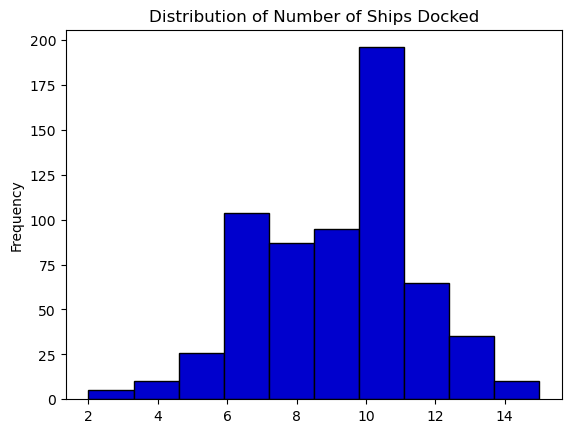

<Figure size 640x480 with 0 Axes>

In [34]:
train.num_at_berth.plot.hist(color = "mediumblue", ec="black")

plt.title('Distribution of Number of Ships Docked')
plt.show()
plt.savefig('target_distribution.png')

#### Roughly normal distribution of target data

In [11]:
train['weekday'] = train.index.day_name()
train['day_num'] = train.index.day_of_week

In [12]:
train.sample(20)

,num_at_anchor,num_at_berth,departed,avg_days_at_berth,avg_days_anchor_berth,year,month,day,backlog,weekday,day_num
date,,,,,,,,,,,
2016-10-12,0.0,10.0,6.0,2.67,2.67,2016,10,12,0.0,Wednesday,2
2017-09-13,0.0,8.0,5.0,2.60,2.60,2017,9,13,0.0,Wednesday,2
2017-06-28,0.0,10.0,2.0,2.00,2.00,2017,6,28,0.0,Wednesday,2
2016-10-05,0.0,11.0,3.0,2.00,2.00,2016,10,5,0.0,Wednesday,2
2016-09-16,1.0,11.0,4.0,2.50,2.50,2016,9,16,0.0,Friday,4
2017-04-10,0.0,8.0,4.0,3.50,3.50,2017,4,10,0.0,Monday,0
2016-10-19,0.0,8.0,3.0,2.33,2.33,2016,10,19,0.0,Wednesday,2
2016-05-23,0.0,6.0,3.0,3.33,3.33,2016,5,23,0.0,Monday,0
2015-09-09,2.0,10.0,2.0,3.50,3.50,2015,9,9,0.0,Wednesday,2


In [13]:
train['num_at_berth'].mean()

9.230647709320696

In [30]:
train['num_at_berth'].mode()

0    10.0
Name: num_at_berth, dtype: float64

In [31]:
train['num_at_berth'].median()

9.0

#### Findings

Port of LA has 25 docks and an average of 9.5 are occupied on a given, average day. Only 7 of those 25 are dedicated "container terminals" for loading and unloading cargo containers, the rest are for other purposes, including ship maintenance and passenger loading/unloading. Container ships are the most common type of ship and all docks for this purpose are likely filled much of the time. Additional docks are likely filled with bulk, tanker, or passenger ships, or ships undergoing repairs. 

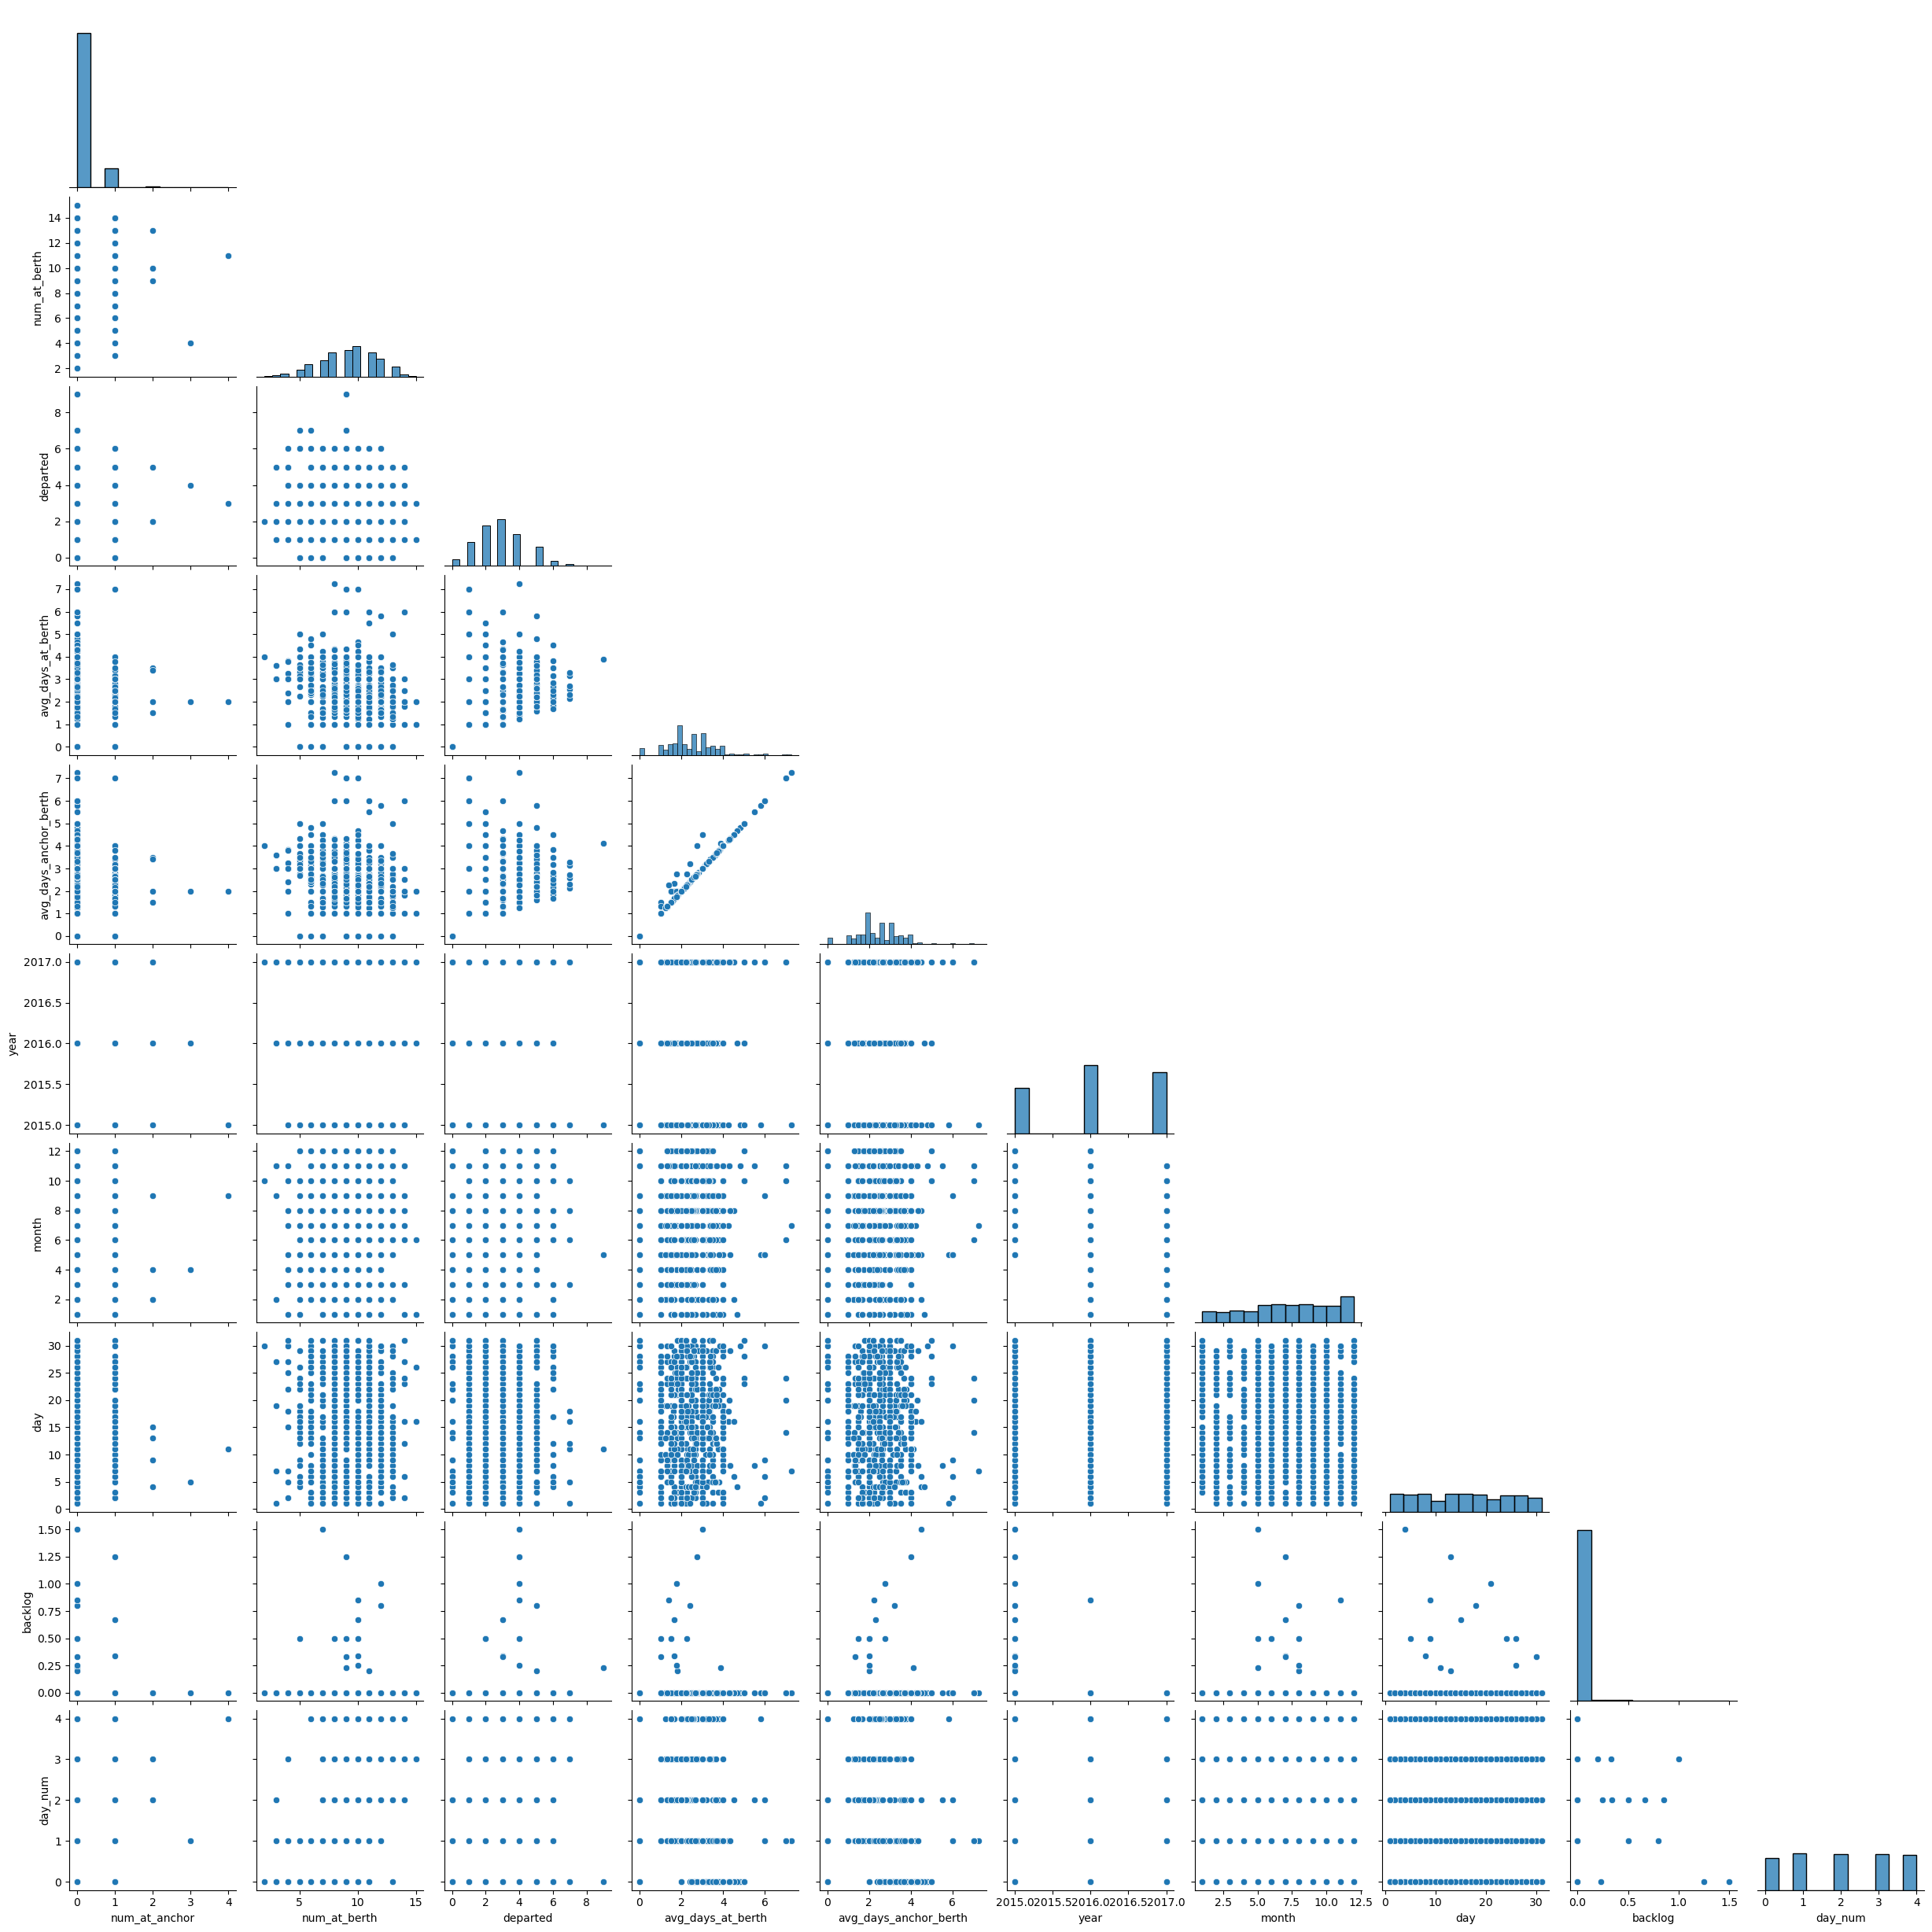

In [14]:
sns.pairplot(train, corner=True)


In [15]:
train_corr = train.drop(columns=['weekday']).corr()
train_corr

,num_at_anchor,num_at_berth,departed,avg_days_at_berth,avg_days_anchor_berth,year,month,day,backlog,day_num
num_at_anchor,1.000000,0.093175,-0.029203,-0.085729,-0.082025,-0.182340,-0.031386,-0.061446,0.035559,0.069306
num_at_berth,0.093175,1.000000,-0.020038,-0.223214,-0.222632,-0.076987,0.024663,-0.001374,0.004494,0.620044
departed,-0.029203,-0.020038,1.000000,0.188163,0.195939,-0.026491,0.052040,-0.017536,0.076573,0.194362
avg_days_at_berth,-0.085729,-0.223214,0.188163,1.000000,0.994706,0.174187,0.041128,-0.003237,-0.046229,-0.208310
avg_days_anchor_berth,-0.082025,-0.222632,0.195939,0.994706,1.000000,0.156421,0.040805,-0.005812,0.056672,-0.215063
year,-0.182340,-0.076987,-0.026491,0.174187,0.156421,1.000000,-0.299985,-0.001258,-0.171784,0.011931
month,-0.031386,0.024663,0.052040,0.041128,0.040805,-0.299985,1.000000,-0.010005,-0.002929,-0.022961
day,-0.061446,-0.001374,-0.017536,-0.003237,-0.005812,-0.001258,-0.010005,1.000000,-0.025045,-0.008418
backlog,0.035559,0.004494,0.076573,-0.046229,0.056672,-0.171784,-0.002929,-0.025045,1.000000,-0.066733
day_num,0.069306,0.620044,0.194362,-0.208310,-0.215063,0.011931,-0.022961,-0.008418,-0.066733,1.000000


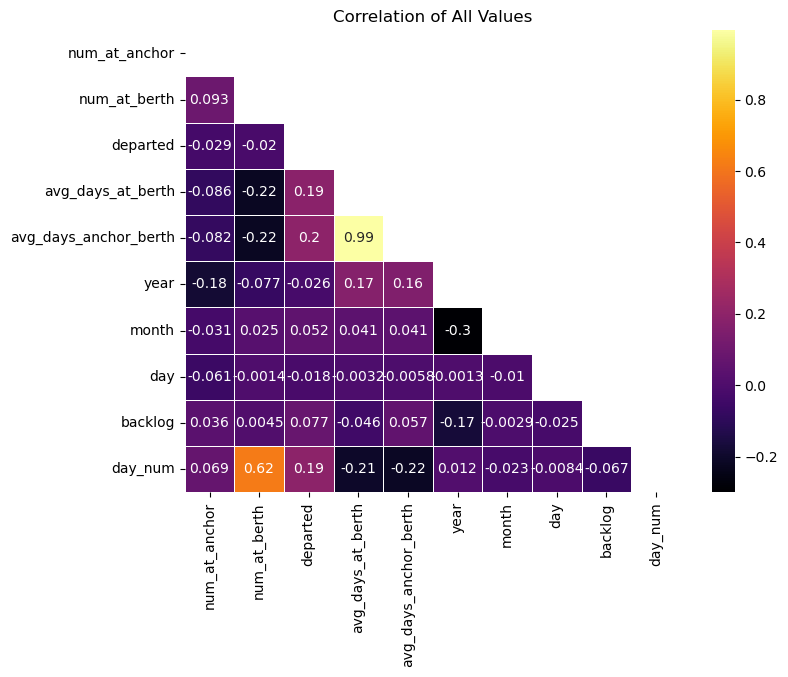

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(train_corr, cmap='inferno', annot=True, linewidth=0.5, mask= np.triu(train_corr))
plt.title('Correlation of All Values')

plt.show()


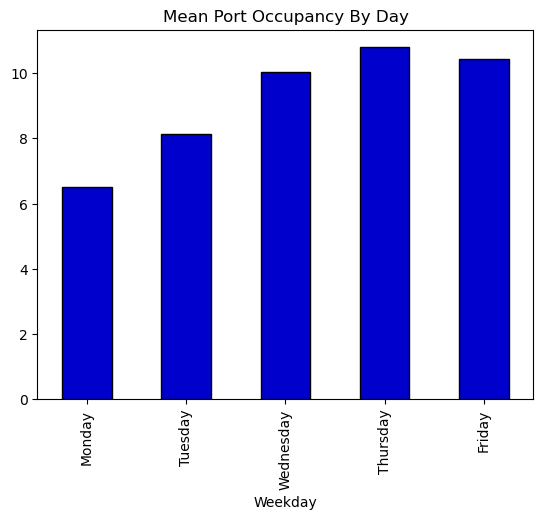

In [38]:
train.groupby('weekday').mean().sort_values('day_num').num_at_berth.plot.bar(color = "mediumblue", ec="black")

plt.title('Mean Port Occupancy By Day')
plt.xlabel('Weekday')
plt.show()

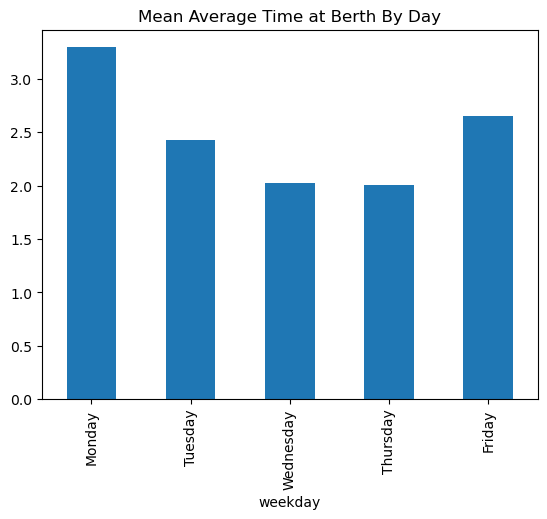

In [18]:
train.groupby('weekday').mean().sort_values('day_num').avg_days_at_berth.plot.bar()

plt.title('Mean Average Time at Berth By Day')
plt.show()

In [19]:
train['avg_days_at_berth'].mean()

2.4576145339652444

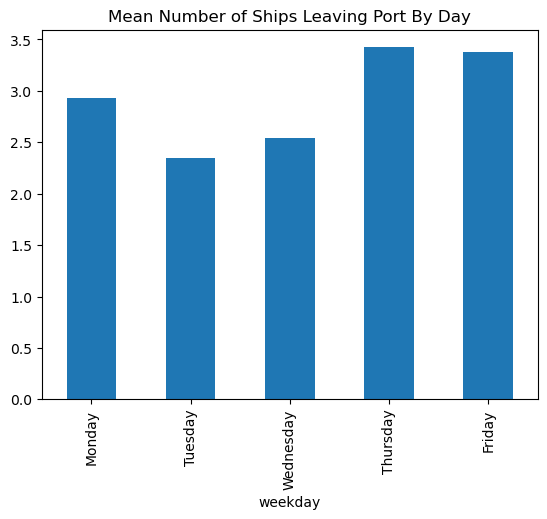

In [20]:
train.groupby('weekday').mean().sort_values('day_num').departed.plot.bar()

plt.title('Mean Number of Ships Leaving Port By Day')
plt.show()

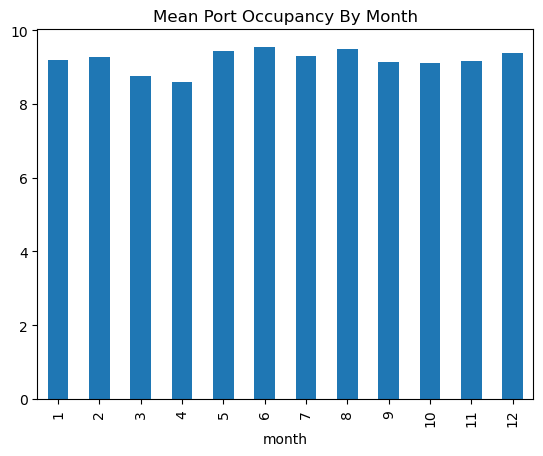

In [21]:
train.groupby('month').mean().sort_values('month').num_at_berth.plot.bar()

plt.title('Mean Port Occupancy By Month')
#plt.ylim(8.75, 10)
plt.show()

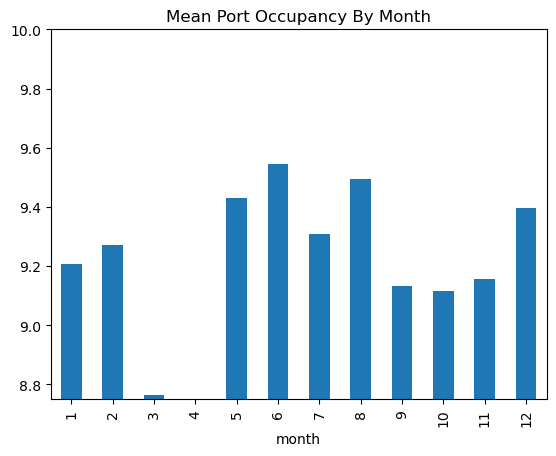

In [22]:
train.groupby('month').mean().sort_values('month').num_at_berth.plot.bar()

plt.title('Mean Port Occupancy By Month')
plt.ylim(8.75, 10)
plt.show()

#### Ho: There is no statistically significant difference in port occupancy between the month of March and the rest of the year

#### Ha: There is a statistically significant difference in port occupancy between the month of March and the rest of the year

#### Alpha = .05

##### One Sample, single tail t-test for difference in mean between march and overall average

In [23]:
# an array of all observed values of the subgroup
train_sample = train[train.month == 3].num_at_berth

# the population mean
overall_mean = train.num_at_berth.mean()

t, p = stats.ttest_1samp(train_sample, overall_mean, alternative='less')

print(t, p)

-1.3125513956897137 0.09831724561260917


### We fail to reject the null hypothesis

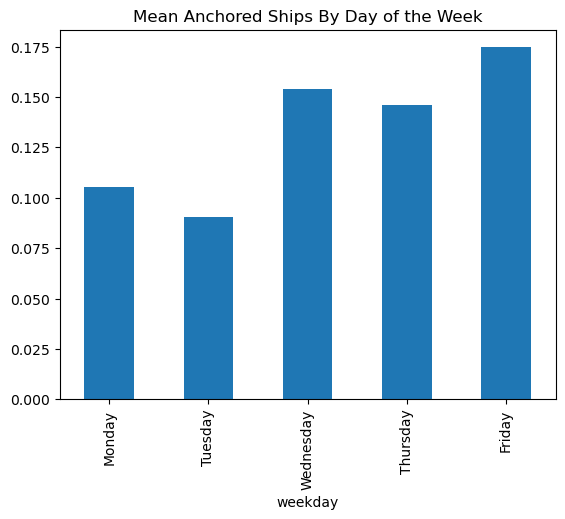

In [24]:
train.groupby('weekday').mean().sort_values('day_num').num_at_anchor.plot.bar()

plt.title('Mean Anchored Ships By Day of the Week')

plt.show()

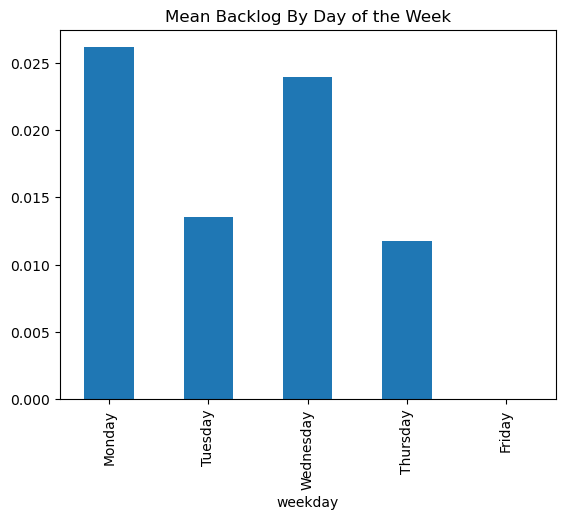

In [25]:
train.groupby('weekday').mean().sort_values('day_num').backlog.plot.bar()

plt.title('Mean Backlog By Day of the Week')
#plt.ylim(.08, .17)
plt.show()

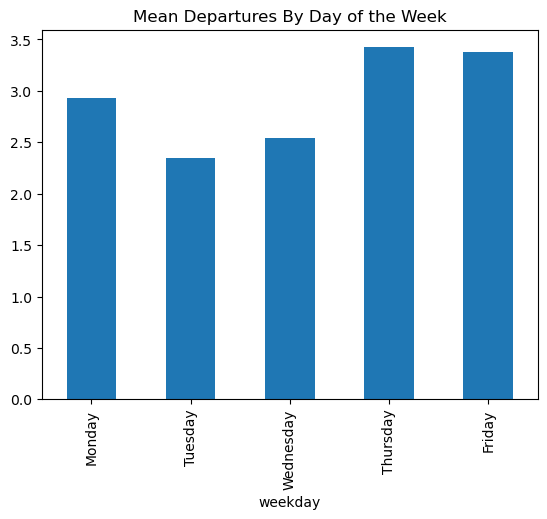

In [26]:
train.groupby('weekday').mean().sort_values('day_num').departed.plot.bar()

plt.title('Mean Departures By Day of the Week')

plt.show()

#### Notes

Anchored (waiting) ships, backlog (time waiting), and departures all increase on average toward the end of the week. 

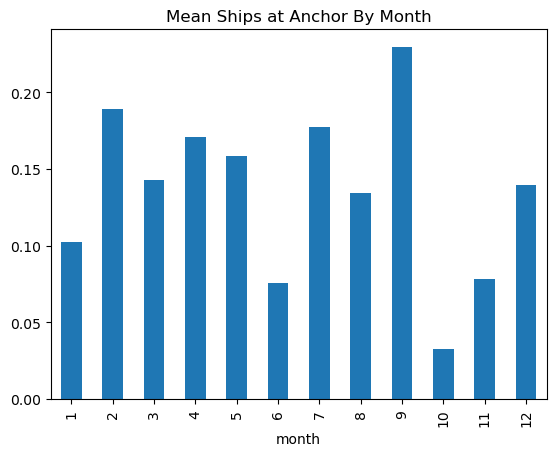

In [27]:
train.groupby('month').mean().sort_values('month').num_at_anchor.plot.bar()

plt.title('Mean Ships at Anchor By Month')

plt.show()

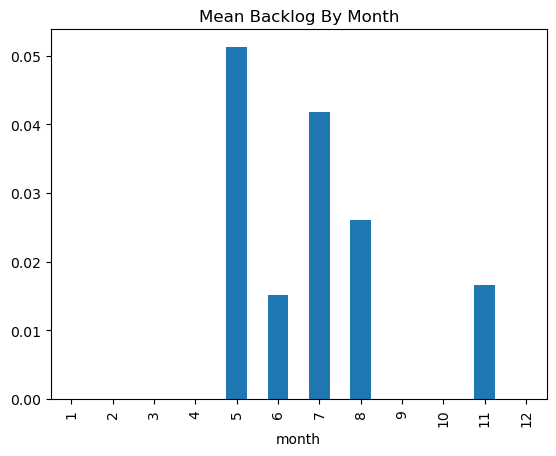

In [28]:
train.groupby('month').mean().sort_values('month').backlog.plot.bar()

plt.title('Mean Backlog By Month')

plt.show()

In [29]:
train.head(20)

,num_at_anchor,num_at_berth,departed,avg_days_at_berth,avg_days_anchor_berth,year,month,day,backlog,weekday,day_num
date,,,,,,,,,,,
2015-05-01,0.0,12.0,5.0,5.80,5.80,2015,5,1,0.00,Friday,4
2015-05-04,0.0,7.0,4.0,3.00,4.50,2015,5,4,1.50,Monday,0
2015-05-05,1.0,7.0,4.0,1.50,1.50,2015,5,5,0.00,Tuesday,1
2015-05-06,1.0,10.0,2.0,1.50,1.50,2015,5,6,0.00,Wednesday,2
2015-05-07,1.0,13.0,2.0,2.00,2.00,2015,5,7,0.00,Thursday,3
2015-05-08,1.0,13.0,2.0,2.00,2.00,2015,5,8,0.00,Friday,4
2015-05-11,0.0,9.0,9.0,3.88,4.11,2015,5,11,0.23,Monday,0
2015-05-12,0.0,9.0,3.0,1.00,1.00,2015,5,12,0.00,Tuesday,1
2015-05-13,0.0,11.0,1.0,1.00,1.00,2015,5,13,0.00,Wednesday,2


#### Notes

March 2015 saw a dock workers strike on the West Coast, pushing shipping to other ports in the US. This resulted in additional backlog and anchored ships, typically an anomoly. 